In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


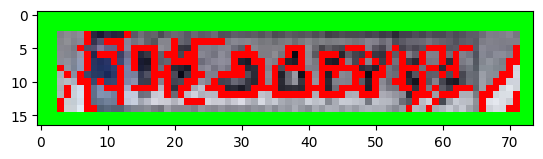

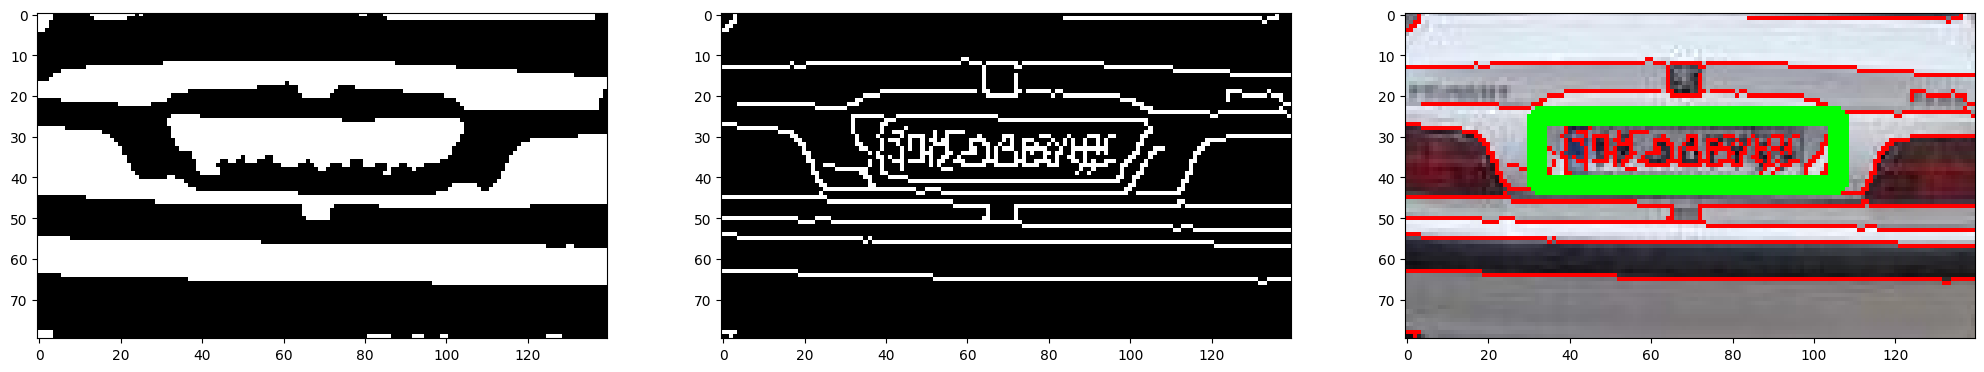

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

width = 800
height = 400

def Area_contours(contours):
    all_Area=[]
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_Area.append(area)
    return all_Area

image =cv2.imread("/content/30.jpg")
gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
gray =cv2.bilateralFilter(gray, 13, 15, 15)

gray = cv2.GaussianBlur(gray, (3,3), 2)

#gray, (3,3), 2
binary1 = cv2.adaptiveThreshold(gray , 255 , cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY_INV , 25 , 1)

binary = cv2.Canny(gray, 30, 200)

contours ,_ = cv2.findContours(binary , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
all_contours = cv2.drawContours(image , contours , -1 , (0,0,255) , 1)

contours = sorted(contours, key=cv2.contourArea, reverse=True)

for c in contours:
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)[:10]
    if len(approx) >= 4 and cv2.contourArea(c) > 500:
        #cv2.contourArea(c) > 1000
        #len(approx) == 4
        x, y, w, h = cv2.boundingRect(c)
        #cv2.drawContours(image, c, -1, (0, 255, 0), 3)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)
        plate = image[y:y+h, x:x+w]
        plt.imshow(plate[...,::-1])
        break




plt.figure(figsize=[25,25])
plt.subplot(131); plt.imshow(binary1 , cmap="gray" )
plt.subplot(132); plt.imshow(binary , cmap="gray" )
plt.subplot(133); plt.imshow(image[...,::-1] )

In [ ]:
cv2.imwrite("plate.jpg" ,plate)

True